# FrostMart UK Businsess insights and strategic reccommedations

## Objective
You are tasked with analysing weekly sales, product details, and store information
datasets to extract business insights and generate strategic recommendations. The goal is
to transform raw data into actionable intelligence for decision-making.

### imports

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### load data

In [ ]:
product_details = pd.read_csv("/content/product_details.csv")
store_info = pd.read_csv("/content/store_info.csv")
supplier_info = pd.read_csv("/content/supplier_info.csv")
weather_data = pd.read_csv("/content/weather_data.csv")
weekly_sales = pd.read_csv("/content/weekly_sales.csv")

In [ ]:
product_details.head()

,Product_ID,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID
0,1000,Whole Wheat Bread 800g,Bakery,4,4
1,1001,White Sandwich Loaf,Bakery,2,8
2,1002,Croissant 4-pack,Bakery,2,5
3,1003,Blueberry Muffins 6-pack,Bakery,4,10
4,1004,Chocolate Chip Cookies,Bakery,4,7


In [ ]:
store_info.head()

,Store_ID,Region,Store_Size,Cold_Storage_Capacity
0,500,London,12000,3788
1,501,Midlands,5000,1086
2,502,North East,4000,998
3,503,Midlands,5000,1243
4,504,London,10000,3330


In [ ]:
supplier_info.head()

In [ ]:
weather_data.head()

In [ ]:
weekly_sales.head()

In [ ]:
weekly_sales.info()

### initial exploration

In [ ]:
def initial_eda(data, name):
  print('='*60)
  print(f'{name} dataset information')
  print(data.info())
  print('='*60)
  print(f'{name} dataset shape')
  print(data.shape)
  print('='*60)
  print(f'{name} dataset description')
  print(data.describe())
  print('='*60)
  print(f'{name} dataset columns')
  print(data.columns)
  print('='*60)
  print(f'{name} dataset missing values')
  print(data.isna().sum())
  print('='*60)
  print(f'{name} dataset duplicate values')
  print(data.duplicated().sum())
  print('='*60)


In [ ]:
initial_eda(product_details, 'product_details')

In [ ]:
initial_eda(store_info, 'store_info')

In [ ]:
initial_eda(supplier_info, 'supplier_info')

In [ ]:
initial_eda(weather_data, 'weather_data')

In [ ]:
initial_eda(weekly_sales, 'weekly_sales')

### Exploratory Data Analysis:

---

Having done initial exploration of the data to check its tidiness in terms of structure, descriptive statistics of the attributes and duplicates, this section moves on to exploring the data in more detail to extract business insights and arrive at strategic recommendations. Specifically, the analyses includes investigating overall business performance, performance of the different categories of products , performance at the regional level, pricing strategy, promotion effectiveness, marketing spend effectiveness,roduct performance, seasonal trends, shelf-life impact and analysis of store efficiency.

#### Overall Business performance

---
This section investigate the performance of the business in terms of total units sold, total wastage and the wastage rate.  The wastage rate tells us what percentage of the total units handled were wasted.


In [ ]:
total_units_sold = weekly_sales['Units_Sold'].sum()
print(f"Total Sales Volume,ie. total Units Sold is {total_units_sold}")  # total units sold

total_wastage = weekly_sales['Wastage_Units'].sum()
print(f"Total Wastage is {total_wastage}")  # total wastage


wastage_rate = (total_wastage / total_units_sold)*100
print(f"Total wastage rate is {wastage_rate:.2f}%")

Total Sales Volume,ie. total Units Sold is 61482249
Total Wastage is 4786490
Total wastage rate is 7.79%


#### Product Category Performance

---
This section investigates which product category has the highest sales, which category has the highest wastage rate and the category with highest average price. We summarize category-level insights and risks

In [ ]:
weekly_sales.head()

,Week_Number,Product_ID,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price
0,2024-W01,1000,500,4853,670.37,0,718,2.46
1,2024-W01,1001,500,4274,1089.62,0,641,1.27
2,2024-W01,1002,500,4215,1004.99,10,632,2.74
3,2024-W01,1003,500,5768,859.45,20,853,1.82
4,2024-W01,1004,500,3403,576.70,0,503,3.46


In [ ]:
# merge relevant data to extract the required information: weekly sales data and product details
pdt_info = product_details.merge(weekly_sales, on='Product_ID')
pdt_info.head()

,Product_ID,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID,Week_Number,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price
0,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,500,4853,670.37,0,718,2.46
1,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,501,1911,1280.28,0,282,3.76
2,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,502,3080,1509.55,0,455,3.81
3,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,503,2856,1101.11,0,422,1.09
4,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,504,3211,1701.66,0,475,2.72


In [ ]:
# calculate sales for each product category
pdt_category_sales_vol =pdt_info.groupby('Product_Category')['Units_Sold'].sum().sort_values(ascending=False).reset_index()

In [ ]:
pdt_category_sales_vol

,Product_Category,Units_Sold
0,Dairy,24514345
1,Bakery,17802002
2,Beverages,12221362
3,Meat,6944540


In [ ]:
#calculate wastage rate per category
pdt_cat_sales_waste = pdt_info.groupby('Product_Category').agg({
    'Units_Sold': 'sum',
    'Wastage_Units': 'sum'
})


pdt_category_wastage_rate =  (pdt_cat_sales_waste['Wastage_Units'] / pdt_cat_sales_waste['Units_Sold'] * 100).sort_values(ascending=False).reset_index().rename(columns={0: 'Wastage_Rate'})

In [ ]:
pdt_category_wastage_rate

,Product_Category,Wastage_Rate
0,Bakery,14.729124
1,Meat,9.487137
2,Dairy,4.913772
3,Beverages,2.462852


In [ ]:
# calculate average waste per product category
pdt_category_avg_price = pdt_info.groupby('Product_Category')['Price'].mean().sort_values(ascending=False).reset_index()

In [ ]:
#CALCUALTE  SALES REVENUE FOR EACH PRODCUT CATEOGRY
pdt_info['Sales_Revenue(£)']=pdt_info['Units_Sold']*pdt_info['Price']
pdt_category_sales_revenue = pdt_info.groupby('Product_Category')['Sales_Revenue(£)'].sum().sort_values(ascending=False).reset_index()

In [ ]:
pdt_category_sales_revenue

,Product_Category,Sales_Revenue(£)
0,Dairy,69004913.73
1,Beverages,50322427.06
2,Meat,50004387.20
3,Bakery,42702397.77


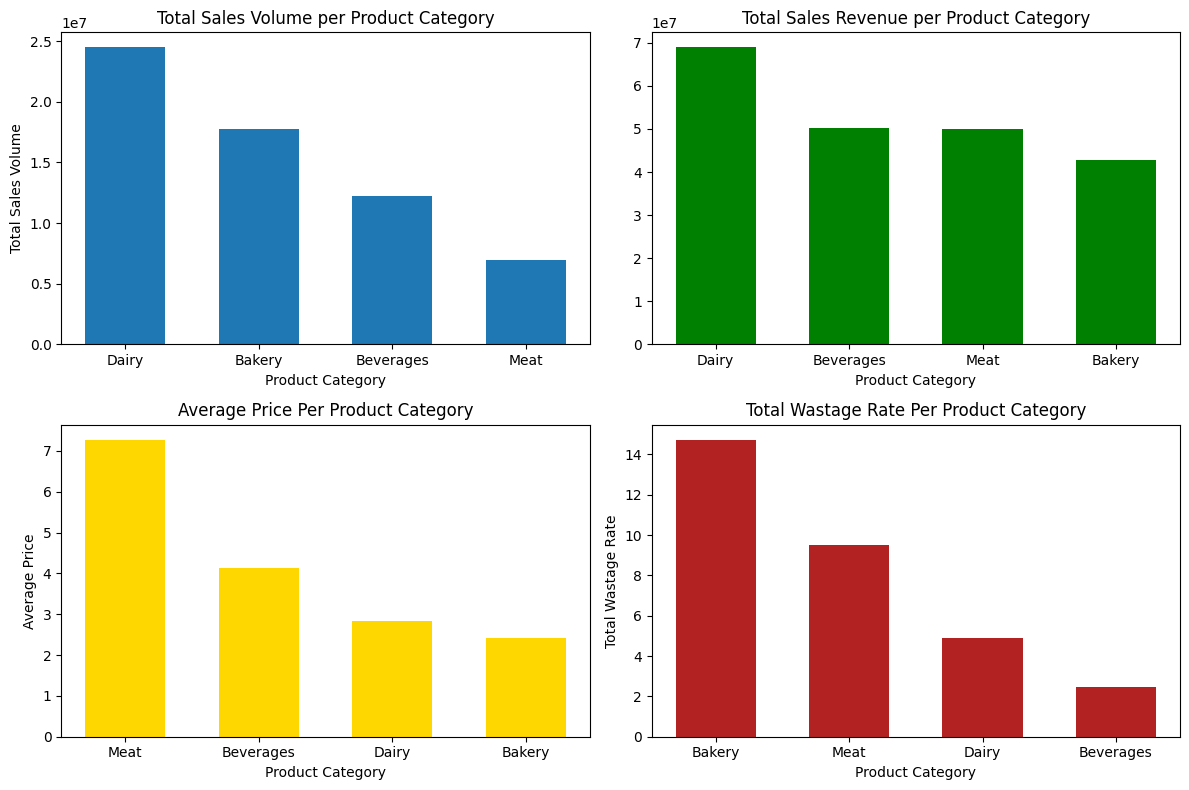

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 8))

#Plot the Total Sales Volume per Product Category
plt.subplot(2,2,1)
plt.bar(pdt_category_sales_vol['Product_Category'],
        pdt_category_sales_vol['Units_Sold'],
        #color='Blue',
        width=0.6)
plt.title('Total Sales Volume per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Volume')


#plot total sales revenue
plt.subplot(2,2,2)
plt.bar(pdt_category_sales_revenue['Product_Category'],
        pdt_category_sales_revenue['Sales_Revenue(£)'],
        color='Green',
        width=0.6)
plt.title('Total Sales Revenue per Product Category')
plt.xlabel('Product Category')
plt.ylabel


#plot average price per product catergory
plt.subplot(2,2,3)
plt.bar(pdt_category_avg_price['Product_Category'],
        pdt_category_avg_price['Price'],
        color='gold',
        width=0.6)
plt.title('Average Price Per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price')


#Plot total wastage rate per product categgory
plt.subplot(2,2,4)
plt.bar(pdt_category_wastage_rate['Product_Category'],
        pdt_category_wastage_rate['Wastage_Rate'],
        color='firebrick',
        width=0.6)
plt.title('Total Wastage Rate Per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Wastage Rate')

plt.tight_layout()
plt.show()

plt.savefig("category_performance_dashboard.png", dpi=300, bbox_inches='tight')

In [ ]:
plt.savefig("category_performance_dashboard.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>